Stage 5. Feature Engineering

🙋 Feature Engineering이 무엇인가요?

Feature Engineering(특성 공학)은 원본 데이터의 특성을 추출하거나 변형하여 모델의 성능을 향상시키는 과정을 말합니다.

이를 통해 예측 또는 분류와 같은 작업을 수행할 때 더 나은 결과를 얻을 수 있도록 도와줍니다.

< 스테이지 2. 데이터 확인 > 기억 나시나요?

스테이지 2에서 저희는 간단하게 데이터프레임을 살펴보면서 결측치 처리와 음수인 날짜 데이터를 1년을 기준으로 바꿔주는 작업을 했었습니다.

이전 작업들이 바로 Feature Engineering의 일종입니다!✨

이번 스테이지에서는 좀 더 심도 있는 Feature Engineering을 학습해보겠습니다~

이전 스테이지에서 EDA를 통해 알게 된 데이터의 특징을 정리해볼게요!

EDA를 통해서 알게 된 사실들을 다음과 같이 정리해줄 수 있을 것 같아요.🔍

전체적인 credit 데이터는 2 - 64.13%, 1 - 23.69%, 0 - 12.18%의 분포를 가지고 있습니다.

FLAG_MOBIL 변수는 모두 1의 값을 가지고 있었습니다.

Numerical 변수에서는 credit 2인 사람들의 begin_month 분포가 큰 쪽에 있는 것을 볼 수 있었습니다.

Numerical 변수에서 income_total, DAYS_EMPLOYED는 치우쳐진 분포를 보였습니다.

child_num, family_size는 이상치 데이터(5 초과)를 확인할 수 있었습니다. 이상치 데이터는 credit 2에서만 확인할 수 있었습니다.

child_num과 family_size는 매우 큰 상관관계(0.89)가 있었습니다.

Categorical 변수들의 경우 균등하게 분포하고 있지 않습니다.

edu_type, family_type, house_type은 70% 이상의 대부분을 차지하는 값이 있었습니다.

occyp_type의 경우 직업에 따라, 특히 값이 적어질수록 credit의 분포가 다름을 알 수 있었습니다.

이제 위의 특징들을 데이터셋에 녹여서 만들어주도록 할게요!

데이터를 불러오기

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from google.colab import files
uploaded= files.upload()

Saving sample_submission.csv to sample_submission.csv


In [2]:
from google.colab import files
uploaded= files.upload()

Saving test.csv to test.csv


In [3]:
from google.colab import files
uploaded= files.upload()

Saving train.csv to train.csv


In [11]:

# pandas 패키지를 pd라는 별칭으로 불러옵니다.
import pandas as pd

# train 데이터를 불러옵니다.
train = pd.read_csv('train.csv')
# test 데이터를 불러옵니다.
test = pd.read_csv('test.csv')
# submission 데이터를 불러옵니다.
submission = pd.read_csv('sample_submission.csv')

In [20]:

# train 데이터를 확인합니다
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.079452,12.901370,0,0,0,No job,2.0,6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.178082,4.219178,0,0,1,Laborers,3.0,5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.293151,12.147945,0,1,0,Managers,2.0,22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.336986,5.731507,0,1,0,Sales staff,2.0,37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.197260,5.767123,0,0,0,Managers,2.0,26.0,2.0


Step 1. 불필요한 변수 제거

첫 번째로, 불필요한 변수를 제거해주도록 할게요.

의미없는 변수들은 Over-fitting이 발생하도록 만들기 때문에 제거해주는 것이 좋습니다!

💡 Over-fitting이란?

Over-fitting은 학습 데이터에 과적합되어 있는 상태를 의미합니다.

이는 일반적인 패턴을 학습하는 데에 실패하여 충분히 학습하지 못한 Under-fitting과 마찬가지로 모델링의 예측력을 떨어뜨리게 만듭니다.

In [12]:
train = train.drop(columns=["index", "FLAG_MOBIL"])

# test 데이터도 마찬가지로 제거해주도록 하겠습니다!

test = test.drop(columns=['index', 'FLAG_MOBIL'])

In [15]:

train.loc[train["DAYS_EMPLOYED"]> 0, "DAYS_EMPLOYED"] = 0
train["DAYS_BIRTH"] = (train["DAYS_BIRTH"] * -1) / 365.0
train["DAYS_EMPLOYED"] = (train["DAYS_EMPLOYED"] * -1) / 365.0
train["begin_month"] = (train["begin_month"] * -1)
#각 변수들을 날짜 단위가 아닌 연 단위로 바꿨음

In [16]:

test.loc[test["DAYS_EMPLOYED"] > 0,"DAYS_EMPLOYED"] = 0
test["DAYS_BIRTH"] = (test["DAYS_BIRTH"] * -1) / 365.0
test["DAYS_EMPLOYED"] = (test["DAYS_EMPLOYED"] * -1) / 365.0
test["begin_month"] = (test["begin_month"] * -1)
#테스트 데이터도 똑같이 적용함

In [17]:

#결측치 처리하기. 결측치를 no job으로
train['occyp_type'] = train['occyp_type'].fillna('No job')

In [18]:

test["occyp_type"] = test["occyp_type"].fillna("No job")
#테스트 데이터도 똑같이 결측치 처리

Step 2. 치우쳐진 데이터(Skewed Data)처리

다음으로 치우쳐진 데이터(Skewed Data)를 처리해주도록 하겠습니다!

🙋 Skewed Data를 꼭 전처리해주어야 하나요?

Skewed Data는 데이터가 한 쪽 끝으로 치우쳐진 데이터를 의미합니다. 만약 Skewed Data를 처리하지 않는다면, 많은 모델들이 제대로 학습하지 못합니다! 그 이유는 Skewed Data가 이상치처럼 작동하기 때문입니다. 특히 회귀 모델로 학습한다면 학습에 큰 악영향을 미치게 됩니다.

스테이지 4에서 boxplot을 그려보았을 때, income_total, DAYS_EMPLOYED 변수는 Skewed된 분포를 보였습니다. 히스토그램을 그려서 다시 한 번 확인해보도록 하겠습니다! seaborn 패키지를 활용해서 복습해보세요!

우선 시각화를 위한 라이브러리를 불러올게요!

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

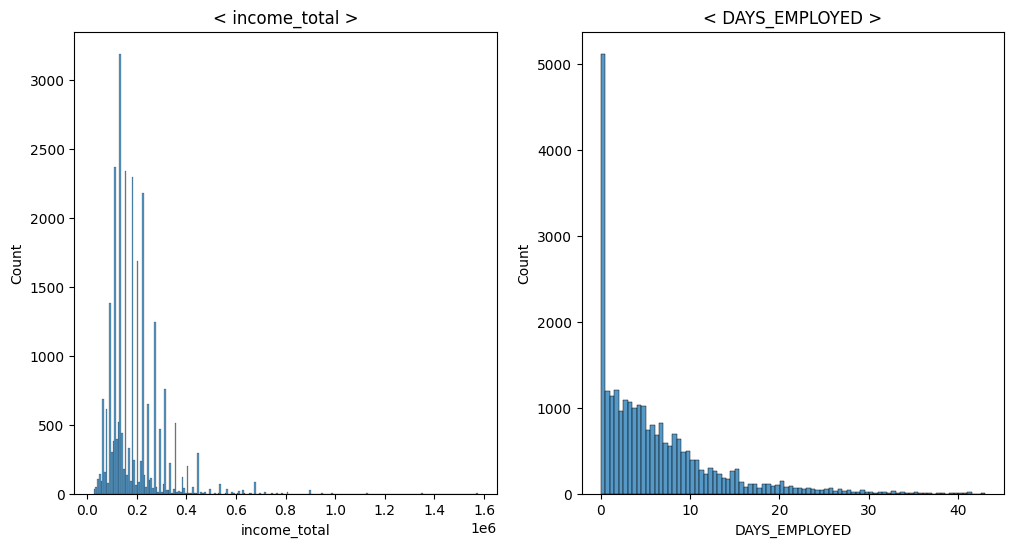

In [19]:

# income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=train, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")
plt.show()

두 그래프 모두 왼쪽으로 치우쳐진 모습을 볼 수 있습니다!

이번에는 분포의 왜곡을 수치화해보도록 하겠습니다.

분포도의 왜곡을 확인하기 위해서는 왜도(Skewness)와 첨도(Kurtosis)를 알아야 합니다.

왜도(Skewness) 분포의 대칭성을 나타내는 척도입니다. 완벽하게 대칭인 분포는 0을 나타냅니다. 왼쪽으로 치우친 분포의 경우, 왜도는 양수의 값을 갖게 됩니다. 반대로 오른쪽으로 치우친 분포의 경우, 음수의 값을 갖게 됩니다.

**첨도(Kurtosis)**

첨도는 확률 분포의 꼬리의 두꺼운 정도를 나타내는 척도입니다.

값이 3에 가까우면 산포도(퍼져있는 정도)가 정규분포에 가깝습니다.

값이 3보다 작다면(K<3) 꼬리가 정규분포보다 얇은 분포로 여길 수 있습니다.

값이 3보다 크다면(K>3) 꼬리가 정규분포보다 두꺼운 분포로 여길 수 있습니다.

왜도와 첨도는 Scipy패키지의 stats 모듈에서 각각 skew와 kurtosis 함수로 쉽게 구할 수 있습니다!

In [21]:

from scipy.stats import skew, kurtosis

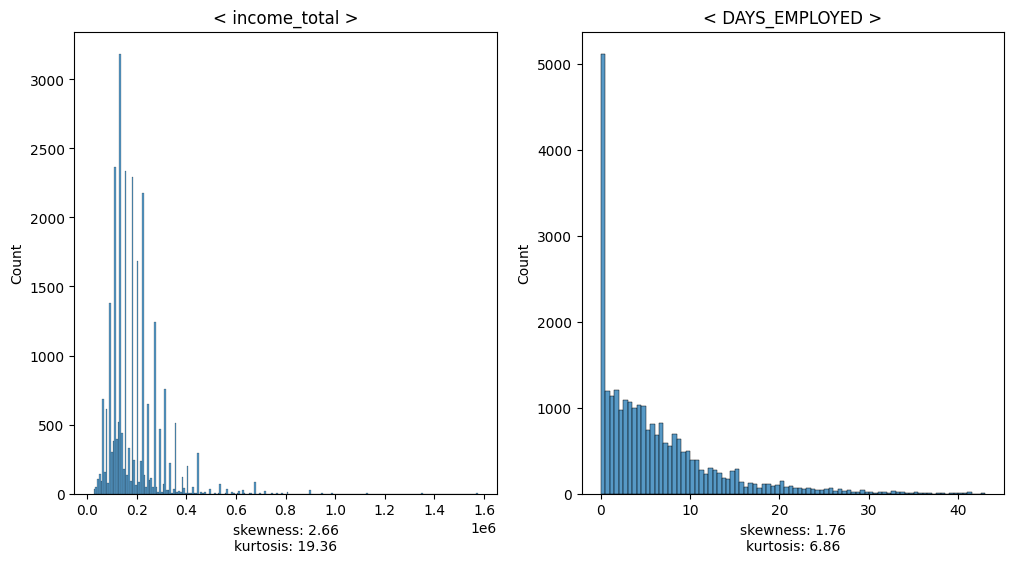

In [22]:

# income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=train, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(train[col])
  kurto = kurtosis(train[col], fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()

이번에는 test 데이터에 대해서 income_total, DAYS_EMPLOYED 변수의 분포 및 왜도와 첨도를 확인해보도록 하겠습니다!

🔍️ Inst.

✔️ test 데이터의 income_total, DAYS_EMPLOYED 변수로 히스토그램을 그려보세요!

✔️ 하나의 figure에 2개의 열로 그려주세요! figsize=(12, 6)로 설정해주도록 하겠습니다.

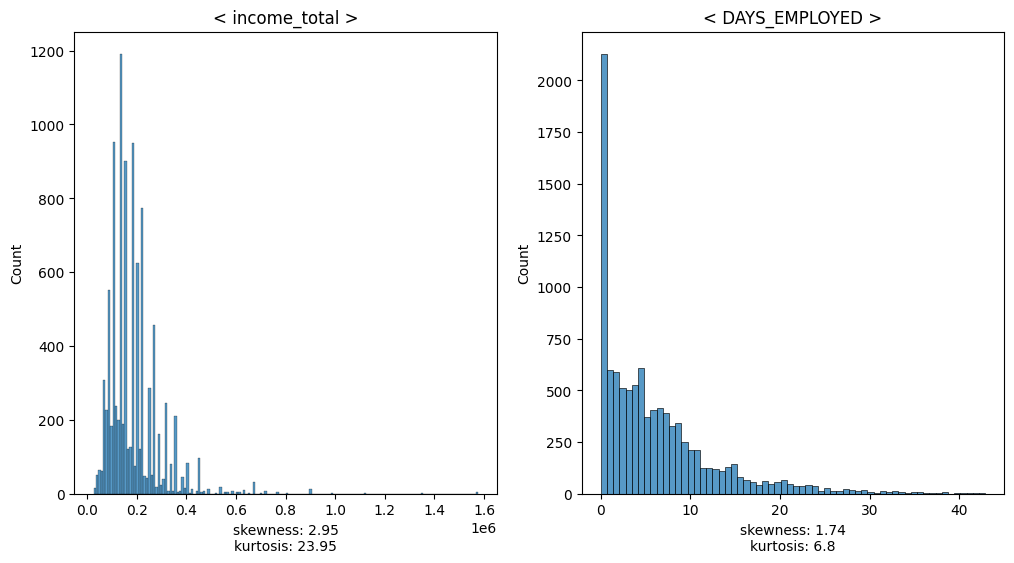

In [23]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=test, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(test[col])
  kurto = kurtosis(test[col], fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()


그렇다면 Skewed Data는 어떻게 처리해야 할까요?

바로 로그 변환(Log Transformation)을 통해 그래프를 정규화시켜줄 수 있습니다!

데이터의 로그 변환 결과를 통해 정규분포에 가깝게 만들어줄 수 있습니다.

로그 변환을 위해 Numpy 패키지의 np.log() 함수를 사용해주도록 하겠습니다.

In [24]:
import numpy as np

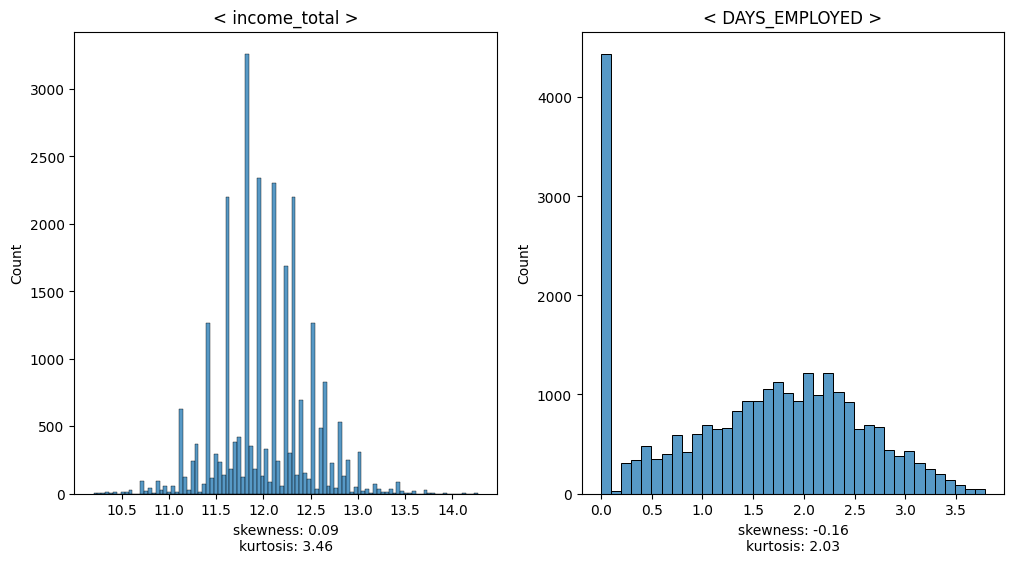

In [25]:

# income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  if i == 1:
    data = np.log(train[col] + 1)
  else:
    data = np.log(train[col])
  sns.histplot(data=data, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(data)
  kurto = kurtosis(data, fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()

확실하게 분포가 정규분포에 가까워졌네요!

train 데이터에 로그 변환을 적용해주도록 하겠습니다.

0인 데이터에는 로그 변환을 적용할 수 없기 때문에 DAYS_EMPLOYED 변수는 1을 임의로 더해주도록 하겠습니다.

In [26]:

# train 데이터의 income_total, DAYS_EMPLOYED 변수에 로그 변환을 적용합니다

train["income_total"] = np.log(train["income_total"])
train["DAYS_EMPLOYED"] = np.log(train["DAYS_EMPLOYED"] + 1)

🔍️ Inst.

✔️ test 데이터의 income_total, DAYS_EMPLOYED 변수에 로그 변환을 적용해주세요!

In [27]:
# test 데이터의 income_total, DAYS_EMPLOYED 변수에 로그 변환을 적용합니다

test["income_total"] = np.log(test["income_total"])
test["DAYS_EMPLOYED"] = np.log(test["DAYS_EMPLOYED"] + 1)

Step 3. 이상치 데이터 (범주형 변수 추가)

앞선 EDA의 결과로, child_num 변수에서 이상치 데이터(5 이상)를 확인할 수 있었습니다.

특이한 점은, 이 이상치 데이터는 credit=2에서만 확인할 수 있었다는 점입니다.

일반적으로 이상치 데이터가 존재한다면, 가장 많이 하는 처리 방법은 제거입니다.

그러나, child_num이 5 초과인 변수에서 뚜렷한 패턴이 존재했기 때문에

카테고리형 변수를 추가로 만들어주도록 하겠습니다.

새로운 변수의 이름은 child_num_over_five라고 지어주도록 하겠습니다!

이 변수는 자식 수에 따라 True, False 값을 가지는 변수입니다!

In [28]:
# 변수 child_num_over_five를 추가합니다

train["child_num_over_five"] = train["child_num"] > 5

In [29]:
# test 데이터에 변수 child_num_over_five를 추가합니다
test["child_num_over_five"] = test["child_num"] > 5

Step 4. 중복된 행 처리하기

한 사람당 신용카드를 한 번만 발급받을까요?

신용카드 발급 월에 상관없이 여러 번 발급받는 사람도 존재할 겁니다!

데이터프레임의 duplicated() 메서드는 중복된 행을 알려줍니다.

신용카드 발급 월에 상관없이 여러 번 발급받은 데이터가 얼마나 될까요? 확인해봅시다!🧐

🔍️ Inst.

✔️ train 데이터에서 신용카드 발급 월에 상관없이 여러 번 발급받은 중복된 데이터를 확인해보세요!

In [30]:

# train 데이터의 중복된 행을 확인합니다
train.drop(columns="begin_month").duplicated().sum()

14358

train 데이터에서 무려 14362개의 행이 중복되었네요!

test 데이터도 확인해주도록 할게요.

In [31]:

test.drop(columns="begin_month").duplicated().sum()

4415

test 데이터도 4416개의 행이 중복되었다는 것을 확인할 수 있습니다.

중복 데이터가 많으면 모델의 학습에 악영향을 미칠 수 있습니다.

중복 데이터는 모델의 과적합을 유발시키고, 왜곡된 결과를 만들 가능성이 높아집니다.

일반적인 패턴 학습을 어렵게 만드는 것이 큰 문제라고 할 수 있습니다.

중복된 데이터를 처리해주는 가장 간단한 방법은 제거하는 방법입니다.

그러나, train 데이터는 중복된 행의 개수가 너무 많아서 제거한다면 데이터의 크기가 크게 줄어들 거에요.

따라서 모델이 충분히 패턴을 학습하지 못하게 만들 수 있습니다.

🌟 따라서 제거하지 않고, 다음과 같은 방법을 적용해보겠습니다! 🌟

신용카드를 여러 번 발급받는 사람들에게서 패턴을 학습할 수 있도록 새로운 변수를 추가해줄게요!

신용카드 중복 발급 수를 나타내는 duplicated_num 변수를 추가해주겠습니다.

In [32]:
# 신용카드 중복 발급 수를 나타내는 duplicated_num 변수를 추가합니다

train_drop = train.drop(columns="begin_month")
duplicated_num = train_drop.groupby(train_drop.columns.tolist(), as_index=False).transform('size')
train["duplicated_num"] = duplicated_num

In [33]:

# train 데이터를 확인합니다
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,child_num_over_five,duplicated_num
0,F,N,N,0,12.218495,Commercial associate,Higher education,Married,Municipal apartment,38.079452,2.631987,0,0,0,No job,2.0,6.0,1.0,False,2
1,F,N,Y,1,12.419166,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.178082,1.652340,0,0,1,Laborers,3.0,5.0,1.0,False,1
2,M,Y,Y,0,13.017003,Working,Higher education,Married,House / apartment,52.293151,2.576265,0,1,0,Managers,2.0,22.0,2.0,False,5
3,F,N,Y,0,12.218495,Commercial associate,Secondary / secondary special,Married,House / apartment,41.336986,1.906799,0,1,0,Sales staff,2.0,37.0,0.0,False,1
4,F,Y,Y,0,11.967181,State servant,Higher education,Married,House / apartment,41.197260,1.912076,0,0,0,Managers,2.0,26.0,2.0,False,1


코드 설명

train_drop은 train 데이터에서 begin_month 변수를 제거한 데이터프레임입니다.

데이터프레임의 groupby() 메서드는 주어진 변수별로 그룹화 하는 메서드입니다. 예를 들어, groupby() 메서드로 주어진 변수 별 평균, 중앙값 등을 계산할 수 있습니다! as_index=False는 그룹화된 결과를 인덱스로 사용하지 않도록 하는 파라미터입니다.

transform('size') 코드는 행의 중복 횟수를 계산하여 결과를 Series로 반환합니다.

🔍️ Inst.

✔️ test 데이터에 신용카드 중복 발급 수를 나타내는 새로운 변수 duplicated_num을 추가해주세요!

In [34]:
# 신용카드 중복 발급 수를 나타내는 duplicated_num 변수를 추가합니다

test_drop = test.drop(columns="begin_month")
duplicated_num = test_drop.groupby(test_drop.columns.tolist(), as_index=False).transform('size')
test["duplicated_num"] = duplicated_num

Step 5. 파생변수 만들기

Feature Engineering을 할 때, 파생변수를 추가하면 모델의 성능 향상을 가져올 수 있습니다!

before_employed 변수 만들기

먼저 고용되기 전까지의 기간을 나타내는 before_employed 변수를 만들어주겠습니다.

In [35]:
# before_employed 변수 추가
train['before_employed'] =  train['DAYS_BIRTH']-  train['DAYS_EMPLOYED']
test["before_employed"] = test['DAYS_BIRTH']-  test['DAYS_EMPLOYED']

house_owner 변수 만들기

집의 소유 여부에 따라 신용카드의 연체 정도에 영향을 미칠 수도 있을 것 같습니다!

이전 스테이지에서 사용했던 tabulate모듈을 사용하여 house_type에 따른 신용도 비율을 확인해보겠습니다.🔍

In [36]:

# tabulate 모듈을 설치합니다
!pip install tabulate

In [37]:
# house_type에 따른 신용도 비율을 확인합니다

from tabulate import tabulate

output_table = []

types = train["house_type"].value_counts().index

dfs = [train[train["house_type"] == types[i]] for i in range(len(types))]

for i, df in enumerate(dfs):
  output_table.append([types[i],
                      f'{round((len(df) / len(train)) * 100, 2)}%',
                      round(df["credit"].value_counts(normalize=True) * 100, 2).astype("str") + "%"])

print(tabulate(output_table, headers=['House Type', 'Proportion', 'Credit Distribution'], tablefmt='grid'))

+---------------------+--------------+---------------------------------+
| House Type          | Proportion   | Credit Distribution             |
+=====================+==============+=================================+
| House / apartment   | 89.4%        | credit                          |
|                     |              | 2.0    64.31%                   |
|                     |              | 1.0    23.54%                   |
|                     |              | 0.0    12.15%                   |
|                     |              | Name: proportion, dtype: object |
+---------------------+--------------+---------------------------------+
| With parents        | 4.75%        | credit                          |
|                     |              | 2.0    63.09%                   |
|                     |              | 1.0     24.9%                   |
|                     |              | 0.0    12.01%                   |
|                     |              | Name: propor

확실히 집을 소유하지 않은 Rented Apartment 주거 타입은 나머지와 두드러진 분포의 차이를 보이네요!

집의 소유 여부를 나타내는 house_owner 변수를 만들어주겠습니다.

직접 새로운 변수를 만들어보세요!

In [38]:

# house_owner 변수 추가
train["house_owner"] = (train["house_type"] != "Rented apratment")
test["house_owner"] = (test["house_type"] != "Rented apratment")

Step 6. 카테고리형 변수 변환

카테고리형 변수는 주로 문자열 데이터로 DataFrame에서 Obejct나 category형으로 저장됩니다.

하지만, 대부분의 모델들은 수치형 데이터를 입력으로 다루기 때문에 카테고리형 변수는 바로 사용하기 어렵습니다.

따라서 카테고리형 변수를 모델이 이해할 수 있게 바꿔주어야 합니다!

카테고리형 변수들을 변환하는 방법은 다음과 같은 방법들이 있습니다.

One-Hot Encoding: 일반적인 카테고리형 변수 변환 방법으로, 각 변수들을 새로운 이진 변수로 바꿔줍니다.

Label Encoding: 카테고리 값들을 0부터 n-1까지 정수로 매핑하는 방법입니다.

In [39]:

from sklearn.preprocessing import LabelEncoder

In [40]:
 #LabelEncoder로 object 타입 변수들을 수치형 데이터로 변환해줍니다

cols = train.select_dtypes(include=['object'])
le = LabelEncoder()

for col in cols:
    train[col] = le.fit_transform(train[col])

test 데이터도 변환해주도록 하겠습니다.

🔍️ Inst.

✔️ test 데이터의 object 타입 변수들을 LabelEncoder()로 변환해주세요!

In [41]:

# test 데이터의 object 타입 변수들을 LabelEncoder()로 변환합니다
cols = test.select_dtypes(include=['object'])
le = LabelEncoder()

for col in cols:
    test[col] = le.fit_transform(test[col])

Step 7. 전처리된 데이터 저장하기

이렇게 전처리를 마무리해주도록 하겠습니다!

마지막으로 전처리한 데이터를 저장해주도록 할게요!

🔍️ Inst.

✔️ train과 test 데이터를 저장해주도록 할게요!

✔️ index=False로 설정해주세요!

In [43]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)
submission.to_csv("sample_submission.csv", index=False)

Stage 6. 하이퍼파라미터 튜닝 & 최종모델링

스테이지 5에서는 더 좋은 예측 결과를 만들기 위해 Feature Engineering을 진행해주었습니다.

이번 스테이지에서는 여러 모델들을 비교하고 하이퍼파라미터 튜닝으로 최적의 모델을 찾아보겠습니다!

이번에 저희가 다뤄볼 모델은 아래의 4가지입니다!

의사결정나무 (Decision Tree)

랜덤포레스트 (Random Forest)

XGBoost

LightGBM

4개의 모델 중 어떤 모델이 우수한 성능을 보일까요?


앙상블 모델 (Ensemble Model)

이번에 저희가 학습할 모델 중 의사결정나무를 제외한 나머지 세 개의 모델은 모두 앙상블 모델입니다.

앙상블 기법은 여러 개의 기본 모델을 결합하여 더 강력하고 정확한 모델을 만드는 머신러닝 기법입니다.

앙상블은 단일 모델보다 더 좋은 예측 성능을 얻을 수 있고, 과적합을 줄이며 안정적인 결과를 얻을 수 있는 장점이 있습니다!

Step 1. Modeling
1. 의사결정나무

데이터 불러오기

In [44]:

# 데이터 분석에 필요한 라이브러리들을 불러옵니다

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:

# target의 분포를 살펴봅니다
print(train['credit'].value_counts())

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64


train 데이터를 기반으로 학습데이터와 검증데이터의 비율을 8:2로 분리하여 train과 validation으로 분리합니다.

이때 stratify=y를 통해 데이터가 타깃 클래스의 비율을 반영하도록 설정합니다.

In [46]:
X = train.drop(columns='credit')
y = train['credit']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y,
                                                      test_size= 0.2, random_state=42)

#사이킷런의 DecisionTreeClassifier로 모델 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

average: 다중 클래스 분류에서 사용되는 평균 방법을 지정하는 매개변수입니다.

< 주요 average 옵션 >

None: 클래스별로 평가 지표를 계산하고 개별 클래스마다 값을 반환합니다. 이 경우 클래스마다 리콜, 정밀도, F1 스코어 등을 계산한 값을 반환합니다.

'micro': 모든 클래스의 TP, FP, FN을 모두 더하여 전체 데이터에 대한 평가 지표를 계산합니다. 전체 데이터에 대한 하나의 평가 지표 값을 얻을 수 있습니다.

'macro': 각 클래스마다 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산합니다. 클래스의 개수에 상관없이 각 클래스의 영향력을 동일하게 취급합니다.

'weighted': 각 클래스마다 평가 지표를 계산한 뒤, 클래스의 샘플 수를 고려하여 가중 평균을 계산하여 전체 평가 지표 값을 계산합니다. 클래스별 샘플 수가 다른 경우 유용합니다.

'samples': 다중 레이블 분류에서 사용되며, 각 샘플에 대해 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산합니다.

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, log_loss

pred_1 = dt.predict(X_valid)
valid_cm_1 = confusion_matrix(y_valid, pred_1)
valid_acc_1 = accuracy_score(y_valid, pred_1)
valid_recall_1 = recall_score(y_valid, pred_1, average="weighted")
valid_precision_1 = precision_score(y_valid, pred_1, average="weighted")
valid_f1_1 = f1_score(y_valid, pred_1, average="weighted")

print("Confusion Matrix(혼동행렬): \n",valid_cm_1)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_1*100, 2))
print("Recall(재현율): ", round(valid_recall_1*100, 2))
print("Precision(정밀도): ", round(valid_precision_1*100, 2))
print("F1 Score(정밀도, 리콜의 조화평균): ", round(valid_f1_1, 4))

Confusion Matrix(혼동행렬): 
 [[ 323  141  180]
 [ 122  851  281]
 [ 203  310 2881]]


Accuracy(정확도):  76.63
Recall(재현율):  76.63
Precision(정밀도):  76.84
F1 Score(정밀도, 리콜의 조화평균):  0.7672


classification_report()는 분류 모델의 성능을 종합적으로 평가하기 위한 함수로, scikit-learn 패키지에서 제공되는 기능 중 하나입니다.

이 함수를 사용하면 정확도, 리콜, 정밀도, f1-스코어 등 다양한 평가 지표를 한 번에 출력할 수 있습니다.

In [48]:

from sklearn.metrics import classification_report

# y_valid는 실제 레이블을, pred_1은 모델의 예측 결과
report = classification_report(y_valid, pred_1)
print(report)

              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50       644
         1.0       0.65      0.68      0.67      1254
         2.0       0.86      0.85      0.86      3394

    accuracy                           0.77      5292
   macro avg       0.67      0.68      0.67      5292
weighted avg       0.77      0.77      0.77      5292



feature_importances_ 속성은 모델을 학습시켰을 때, 모델에서 변수들의 중요도를 수치화시킨 속성입니다.

결정트리모델에서 중요한 변수는 무엇이 있었을까요? 한 번 확인해보도록 하겠습니다.

In [49]:

feature_importances = pd.Series(dt.feature_importances_,index=X_valid.columns).sort_values(ascending=False)
feature_importance = feature_importances.head(20)
print(feature_importance)

begin_month            0.201469
DAYS_EMPLOYED          0.125028
income_total           0.117220
DAYS_BIRTH             0.112723
before_employed        0.109601
duplicated_num         0.063891
occyp_type             0.058403
family_type            0.026662
edu_type               0.024559
family_size            0.022939
income_type            0.021437
phone                  0.019315
house_type             0.017584
car                    0.015802
gender                 0.014908
child_num              0.013827
reality                0.012043
work_phone             0.011346
email                  0.011243
child_num_over_five    0.000000
dtype: float64


feature_importances 가 눈에 잘 들어오지 않습니다. matplotlib 라이브러리로 시각화를 해보도록 할게요

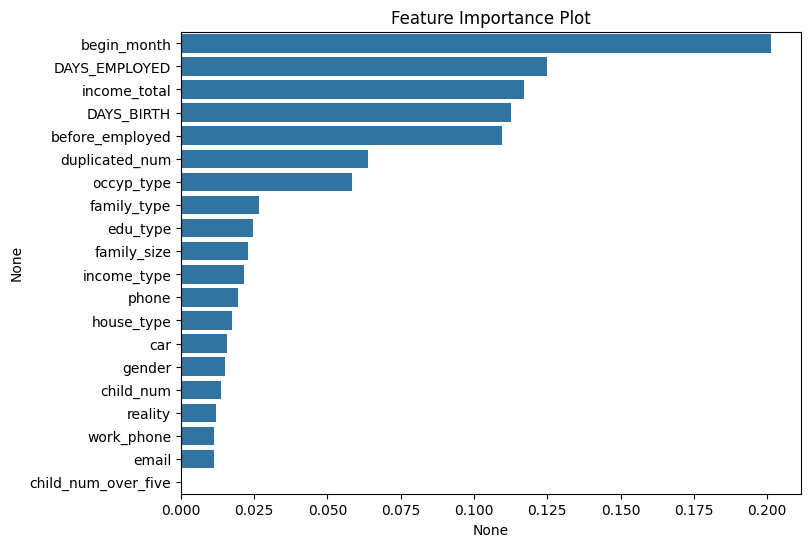

In [50]:
%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature Importance Plot')
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

가장 중요하게 고려한 피쳐는 begin_month네요.

log_loss()의 평가 지표로 손실을 수치화시켜 보겠습니다!

log_loss는 로그 손실로 0에 가까울수록 좋은 지표입니다! 실제 클래스를 낮은 확률로 예측할수록 큰 페널티를 주는 평가 지표입니다.

log_loss를 위해서는 예측 확률을 계산해야 합니다. predict_proba() 메서드는 예측 확률을 계산할 수 있게 해줍니다!

In [51]:

prob_1 = dt.predict_proba(X_valid)

log_loss_1 = log_loss(y_valid, prob_1)
print("Log loss(로그 손실): ", round(log_loss_1, 4))

Log loss(로그 손실):  8.3661


결정트리에서는 8.3661의 값을 보이는군요.

그럼 두번째 모델로 랜덤포레스트에 대해 알아보고, 비교해 보겠습니다!

2. 랜덤 포레스트(Random Forest)

랜덤 포레스트(Random Forest)는 머신 러닝에서 사용되는 강력한 앙상블(Ensemble) 학습 알고리즘 중 하나입니다.

랜덤 포레스트는 여러 개의 의사결정 트리(Decision Tree)를 생성하고 이들을 조합하여 예측을 수행합니다.

랜덤 포레스트는 배깅(Bagging) 알고리즘을 사용하는 대표적인 모델입니다.

RandomForestClassifier로 모델생성 후 fit() 메서드로 학습, predict() 메서드로 X_valid 데이터에 대한 예측값을 pred_2에 저장하고 평균 정확도와 오차 행렬을 보도록 하겠습니다!

🔍️ Inst.

✔️ RandomForestClassifier 객체를 로드하고, train 데이터를 학습시켜보세요!

✔️ pred_2 변수에 predict() 메서드로 예측 결과를 저장해보세요!

✔️ 마지막으로 평균 정확도와 오차 행렬을 출력해보세요!

In [52]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# 모델 학습 및 예측
rf.fit(X_train, y_train)
pred_2 = rf.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred_2)
print(f'RandomForestClassifier 정확도: {accuracy:.4f}')

# 오차 행렬
cm2 = confusion_matrix(y_valid, pred_2)
print(cm2)

RandomForestClassifier 정확도: 0.8154
[[ 272   95  277]
 [  29  817  408]
 [  51  117 3226]]


사이킷런에서 제공하는 함수와 클래스로 모델의 성능을 더 자세히 평가해 보도록 할게요!

In [53]:
pred_2 = rf.predict(X_valid)
valid_cm_2 = confusion_matrix(y_valid,pred_2)
valid_acc_2 = accuracy_score(y_valid,pred_2)
valid_recall_2 = recall_score(y_valid,pred_2, average='weighted')
valid_precision_2 = precision_score(y_valid,pred_1, average='weighted')
valid_f1_2 = f1_score(y_valid,pred_2, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_2)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_2*100, 2))
print("Recall(재현율): ", round(valid_recall_2*100, 2))
print("Precision(정밀도): ", round(valid_precision_2*100, 2))
print("F1 Score(정밀도,리콜의 조화평균): ", round(valid_f1_2, 4))

Confusion Matrix(혼동행렬): 
 [[ 272   95  277]
 [  29  817  408]
 [  51  117 3226]]


Accuracy(정확도):  81.54
Recall(재현율):  81.54
Precision(정밀도):  76.84
F1 Score(정밀도,리콜의 조화평균):  0.8025


In [54]:
# 변수 중요도 계산

importances_values = pd.Series(rf.feature_importances_, index=X_valid.columns).sort_values(ascending=False)
fr_top20 = importances_values.head(20)
fr_top20



begin_month            0.207786
DAYS_BIRTH             0.116020
before_employed        0.115361
DAYS_EMPLOYED          0.096652
duplicated_num         0.095870
income_total           0.093134
occyp_type             0.055866
family_type            0.026590
family_size            0.022647
edu_type               0.021673
income_type            0.021251
phone                  0.018305
car                    0.017949
reality                0.017703
child_num              0.017245
gender                 0.016849
house_type             0.015079
work_phone             0.014286
email                  0.009712
child_num_over_five    0.000025
dtype: float64

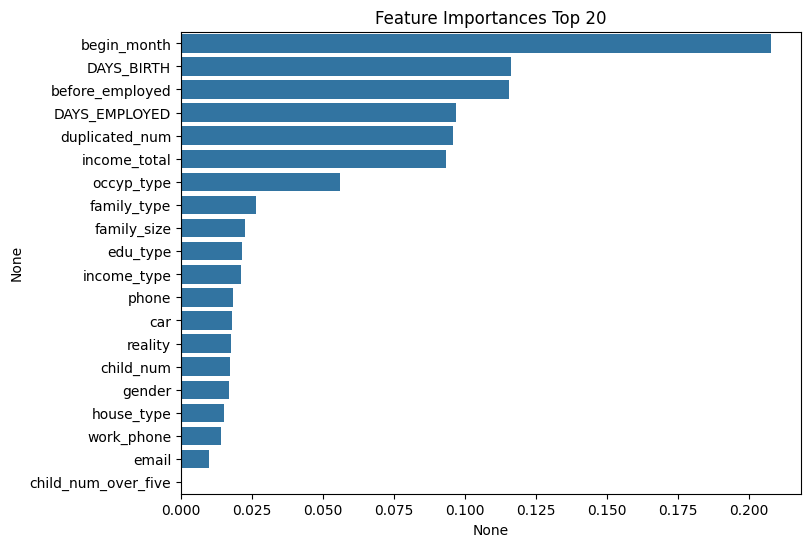

In [55]:
# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=fr_top20, y=fr_top20.index)
plt.show()

랜덤 포레스트 모델도 begin_month를 가장 중요한 변수로 뽑았습니다! 그렇다면 예측은 잘 했을까요? log_loss로 예측해볼게요!

In [56]:
y_prob = rf.predict_proba(X_valid)
log_loss_2 = log_loss(y_valid, y_prob)
print("Log Loss: ", round(log_loss_2, 4))

Log Loss:  0.4966


랜덤포레스트 모델에서 loss가 크게 줄어든 것을 볼 수 있습니다!

그렇다면 또 다른 모델로 학습과 로스율을 보도록 하겠습니다~!

또 다른 유명한 모델 중 하나인 XGBoost입니다!

3. XGBoost

XGBoost(Extreme Gradient Boosting)은 그래디언트 부스팅(Gradient Boosting) 알고리즘을 분산환경에서도 실행할 수 있도록 구현해놓은 머신러닝 라이브러리입니다.

In [57]:
!pip install xgboost

이제 XGBClassifier()로 모델을 생성한 뒤, 이전과 마찬가지로 학습 후 평가를 진행해주도록 하겠습니다.

같은 방식으로 평균 정확도와 오차 행렬을 출력해볼게요!🔥

🔍️ Inst.

✔️ XGBClassifier 객체를 로드하고, train 데이터를 학습시켜보세요!

✔️ 모델의 일관성을 위해 random_state=42로 설정해주세요.

✔️ pred_3 변수에 predict() 메서드로 예측 결과를 저장해보세요!

✔️ 마지막으로 평균 정확도와 오차 행렬을 출력해보세요!

In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

# 모델 학습 및 예측
xgb.fit(X_train, y_train)
pred_3 = xgb.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred_3)
print(f'XGBoost 정확도: {accuracy:.4f}')

# 오차 행렬
cm3 = confusion_matrix(y_valid, pred_3)
print(cm3)

XGBoost 정확도: 0.7260
[[  83   82  479]
 [  19  462  773]
 [  26   71 3297]]


정확도는 0.72 가 나왔네요! 그렇다면 다양한 성능지표로 모델의 예측성능도 평가해 보겠습니다.

In [59]:
pred_3 = xgb.predict(X_valid)
valid_cm_3 = confusion_matrix(y_valid, pred_3)
valid_acc_3 = accuracy_score(y_valid, pred_3)
valid_recall_3 = recall_score(y_valid, pred_3, average='weighted')
valid_precision_3 = precision_score(y_valid, pred_3, average='weighted')
valid_f1_3 = f1_score(y_valid, pred_3, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_3)
print("\n")
print("Accuracy(정확도): ", round(valid_acc_3*100, 2))
print("Recall(재현율): ", round(valid_recall_3*100, 2))
print("Precision(정밀도): ", round(valid_precision_3*100, 2))
print("F1 Score(정밀도,재현율의 조화평균): ", round(valid_f1_3, 4))

Confusion Matrix(혼동행렬): 
 [[  83   82  479]
 [  19  462  773]
 [  26   71 3297]]


Accuracy(정확도):  72.6
Recall(재현율):  72.6
Precision(정밀도):  72.18
F1 Score(정밀도,재현율의 조화평균):  0.6757


변수 중요도를 살펴볼게요!

In [60]:
xgb_importances_values = xgb.feature_importances_
xgb_importances_values

array([0.04520024, 0.04286474, 0.0419057 , 0.03661526, 0.04625534,
       0.04574217, 0.04411096, 0.05271315, 0.04929975, 0.05046767,
       0.05093179, 0.05456126, 0.0526945 , 0.04377752, 0.04568904,
       0.05063753, 0.12726225, 0.        , 0.07007547, 0.04919565,
       0.        ], dtype=float32)

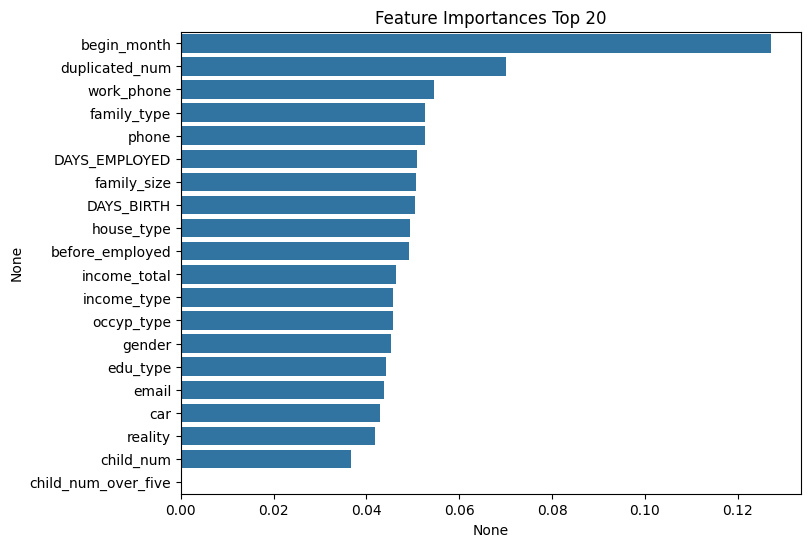

In [61]:

# 변수 중요도 시각화

xgb_importances = pd.Series(xgb_importances_values, index=X_valid.columns).sort_values(ascending=False)
xgb_top20 = xgb_importances.head(20)

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=xgb_top20, y=xgb_top20.index)
plt.show()

XGBoost 모델에서도 가장 중요한 변수로 begin_month를 뽑았네요! log_loss를 계산해서 수치화시켜 보겠습니다.

In [62]:

# log_loss를 계산합니다

y_prob = xgb.predict_proba(X_valid)
log_loss_3 = log_loss(y_valid, y_prob)
print("Log Loss: ", round(log_loss_3, 4))

Log Loss:  0.6424


4. LightGBM

LightGBM에서 gbm 은 Gradient Boosting Model 로 , Tree를 기반으로 하는 학습 알고리즘입니다.

이 모델 또한 가중치를 더하면서 진행하는 방법이기 때문에 XGBoost와 비슷합니다.

LightGBM의 차이점은 다른 알고리즘들과 다르게 Leaf-wise 분할을 한다는 점입니다! Leaf-wise 분할은 Level-wise 분할과 다르게 수직적으로 뻗어나간다는 차이점이 있습니다.

In [63]:
!pip install lightgbm

이제 LGBMClassifier()로 모델을 생성한 뒤, 이전과 마찬가지로 학습 후 평가를 진행해주도록 하겠습니다.

같은 방식으로 평균 정확도와 오차 행렬을 출력해볼게요!🔥

🔍️ Inst.

✔️ LGBMClassifier 객체를 로드하고, train 데이터를 학습시켜보세요!

✔️ 모델의 일관성을 위해 random_state=42로 설정해주세요.

✔️ pred_4 변수에 predict() 메서드로 예측 결과를 저장해보세요!

✔️ 마지막으로 평균 정확도와 오차 행렬을 출력해보세요!

In [65]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

# 모델 학습 및 예측
lgbm.fit(X_train, y_train)
pred_4 = lgbm.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred_4)
print(f'LGBM 정확도: {accuracy:.4f}')

# 오차 행렬
cm4 = confusion_matrix(y_valid, pred_4)
print(cm4)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 19
[LightGBM] [Info] Start training from score -2.105335
[LightGBM] [Info] Start training from score -1.440314
[LightGBM] [Info] Start training from score -0.444193
LGBM 정확도: 0.7203
[[  63   76  505]
 [   3  383  868]
 [   5   23 3366]]


평균정확도가 0.72가 나왔네요!

그렇다면 LightGBM 모델도 성능지표로 모델의 예측성능을 평가해 보도록 할게요!😀

In [66]:
pred_4 = lgbm.predict(X_valid)
valid_cm_4 = confusion_matrix(y_valid, pred_4)
valid_acc_4 = accuracy_score(y_valid, pred_4)
valid_recall_4 = recall_score(y_valid, pred_4, average='weighted')
valid_precision_4 = precision_score(y_valid, pred_4, average='weighted')
valid_f1_4 = f1_score(y_valid, pred_4, average='weighted')

print("Confusion Matrix(혼동행렬): \n", valid_cm_4)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_4*100, 2))
print("Recall(재현율): ", round(valid_recall_4*100, 2))
print("Precision(정밀도): ", round(valid_precision_4*100, 2))
print("F1 Score(정밀도, 리콜의 조화평균): ", round(valid_f1_4, 4))

Confusion Matrix(혼동행렬): 
 [[  63   76  505]
 [   3  383  868]
 [   5   23 3366]]


Accuracy(정확도):  72.03
Recall(재현율):  72.03
Precision(정밀도):  75.18
F1 Score(정밀도, 리콜의 조화평균):  0.6569


변수요도를 통해 예측에 사용된 변수들 중 타깃변수에 가장 많은 영향을 준 변수가 무엇인지 살펴볼게요!

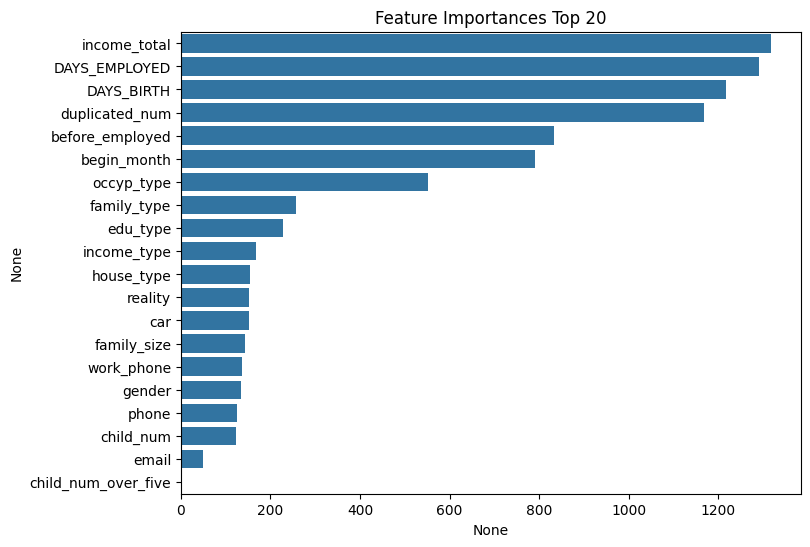

In [67]:

light_importaces_values = lgbm.feature_importances_
light_importaces = pd.Series(light_importaces_values, index=X_valid.columns).sort_values(ascending=False)
light_top20 = light_importaces.head(20)

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=light_top20, y=light_top20.index)
plt.show()

LightGBM 모델에서는 가장 중요한 변수를 income_total로 보았네요! XGBoost와 유사한 알고리즘을 사용하는 모델이지만 다른 결과를 보이니 흥미롭네요!

log_loss까지 마지막으로 출력해보겠습니다!

In [68]:
# log_loss를 계산합니다

y_prob = lgbm.predict_proba(X_valid)
log_loss_4 = log_loss(y_valid, y_prob)
print("Log Loss: ", round(log_loss_4, 4))

Log Loss:  0.6669


5. 모델 성능 비교하기

😎 짜란~ 4가지 모델의 기초 모델링 및 학습이 완료되었습니다!

지금까지 총 4가지의 모델로 앙상블학습을 해보았는데,

이제 이 모든 모델들을 종합해서 평가해봐야겠죠?

모델별 f1_score, log_loss를 비교해서 가장 성능이 좋은 모델을 골라보겠습니다!

In [69]:

# f1_score를 비교합니다

print(f'의사결정나무\t{round(valid_f1_1, 4)}')
print(f'랜덤포레스트\t{round(valid_f1_2, 4)}')
print(f'XGBoost\t\t{round(valid_f1_3, 4)}')
print(f'LightGBM\t{round(valid_f1_4, 4)}')

의사결정나무	0.7672
랜덤포레스트	0.8025
XGBoost		0.6757
LightGBM	0.6569


 평가한 결과, 랜덤포레스트가 0.8025로 가장 높네요!

그렇다면 이제 log_loss 를 통해 성능을 비교해 보겠습니다.

In [70]:
# log_loss를 비교합니다

print(f'의사결정나무\t{round(log_loss_1, 4)}')
print(f'랜덤포레스트\t{round(log_loss_2, 4)}')
print(f'XGBoost\t\t{round(log_loss_3, 4)}')
print(f'LightGBM\t{round(log_loss_4, 4)}')

의사결정나무	8.3661
랜덤포레스트	0.4966
XGBoost		0.6424
LightGBM	0.6669


log_loss는 손실이기 때문에 0에 가까울수록 더 좋은 지표입니다.

여기에서는 랜덤포레스트가 log_loss가 가장 낮은 좋은 모델이라고 판단되네요!

그럼 최종적으로 하이퍼파라미터 튜닝을 시작해 보도록 하겠습니다!

Step 2. Hyperparameter Tuning

하이퍼파라미터는 머신러닝 모델의 동작 및 학습 과정을 제어하는 매개변수입니다.

예를 들어, 아래의 RandomForestClassifier 객체에서 아래와 같은 파라미터를 말합니다.

  n_estimators: `RandomForestClassifier`의 base tree 모델의 개수를 나타냅니다. 사용자가 원하는 값으로 바꿔줄 수 있습니다.
하이퍼파라미터 튜닝이란 모델을 최적화하기 위해 하이퍼파라미터를 조정하는 과정을 말합니다!

1. GridSearch

첫 번째로 Grid Search를 같이 진행해보겠습니다! sklearn 패키지에서는 model_selection 모듈에서 GridSearchCV 객체를 지원합니다! Grid Search를 할 때, 교차 검증(Cross Validation)으로 학습 및 평가할 수 있습니다.

GridSearchCV는 다음과 같이 하이퍼파라미터를 딕셔너리의 형태로 전달해주어야 합니다.

In [71]:
# GridSearchCV 객체를 불러옵니다
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터를 딕셔너리로 설정합니다

params_grid = {
    'n_estimators' : [100, 300, 1000],
    'max_features' : ['sqrt','log2'],
    'max_depth' : [3, 5, 10],
    'criterion' : ['gini','entropy'],
    'min_samples_split' : [2, 5, 20]
}

cv=3으로 설정해줘서 3개의 교차검증 셋만 만들어주도록 하겠습니다.
scoring="neg_log_loss"로 log_loss로 평가하도록 하겠습니다!

In [72]:

# param_grid 하이퍼 파라미터를 3개의 train, valid set fold 로 나누어 테스트 수행

grid_rf = GridSearchCV(rf, param_grid=params_grid, cv=3, verbose=2,
                       scoring="neg_log_loss")

# params_grid 의 하이퍼 파라미터를 순차적으로 학습/평가
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=1000; total time=   7.5s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=1000; total time=   7.3s
[CV] END criter

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 20],
                         'n_estimators': [100, 300, 1000]},
             scoring='neg_log_loss', verbose=2)

Grid Search가 끝났습니다!

Grid Search 결과를 데이터프레임으로 저장해서 좀 더 자세히 살펴보도록 하죠!🔍

In [73]:

# GridSearchCV 결과를 데이터프레임으로 저장합니다

grid_rf_cv = grid_rf.cv_results_
grid_result = pd.DataFrame(grid_rf_cv)
grid_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.452220,0.112605,0.116751,0.030968,gini,3,sqrt,2,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",-0.828952,-0.828120,-0.826752,-0.827941,0.000907,105
1,1.812629,0.071969,0.140861,0.004468,gini,3,sqrt,2,300,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",-0.826872,-0.825834,-0.825017,-0.825908,0.000759,75
2,8.480226,2.423052,0.660817,0.012202,gini,3,sqrt,2,1000,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",-0.828152,-0.826994,-0.825921,-0.827022,0.000911,93
3,0.599373,0.004327,0.056164,0.006193,gini,3,sqrt,5,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",-0.829104,-0.826704,-0.827128,-0.827645,0.001046,97
4,2.046385,0.399985,0.169350,0.024903,gini,3,sqrt,5,300,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",-0.827020,-0.825468,-0.825158,-0.825882,0.000815,73


rank_test_score가 좋은 순으로 정리해보도록 할게요! 그리고 상위 10개의 테스트 결과를 출력해보도록 하겠습니다.

In [74]:
grid_result = grid_result.sort_values("rank_test_score")
grid_result.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
92,17.965684,0.248883,0.929161,0.149105,entropy,10,sqrt,2,1000,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.741077,-0.738493,-0.744041,-0.741204,0.002267,1
101,18.608429,1.290997,0.839332,0.018436,entropy,10,log2,2,1000,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.741077,-0.738493,-0.744041,-0.741204,0.002267,1
91,5.269475,0.560991,0.284976,0.043750,entropy,10,sqrt,2,300,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.742439,-0.739805,-0.744814,-0.742353,0.002046,3
100,5.412244,0.644524,0.278419,0.035082,entropy,10,log2,2,300,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.742439,-0.739805,-0.744814,-0.742353,0.002046,3
99,1.647230,0.018320,0.093233,0.004875,entropy,10,log2,2,100,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.743319,-0.740511,-0.745860,-0.743230,0.002185,5
90,2.026230,0.324701,0.099592,0.014035,entropy,10,sqrt,2,100,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.743319,-0.740511,-0.745860,-0.743230,0.002185,5
104,17.943868,0.296688,0.901546,0.112828,entropy,10,log2,5,1000,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.742635,-0.741317,-0.747170,-0.743707,0.002507,7
95,18.430149,0.245965,0.883187,0.061879,entropy,10,sqrt,5,1000,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.742635,-0.741317,-0.747170,-0.743707,0.002507,7
103,5.283856,0.379952,0.286441,0.045738,entropy,10,log2,5,300,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.743531,-0.741659,-0.747823,-0.744338,0.002580,9
94,5.382548,0.619761,0.282773,0.037087,entropy,10,sqrt,5,300,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.743531,-0.741659,-0.747823,-0.744338,0.002580,9


결과 해석

생각보다 예측기 수에 따른 점수 차이가 크지 않은 것 같습니다.

1000개의 예측기와 100개의 예측기가 모두 상위에 보이네요.

하지만, 트리의 최대 깊이를 나타내는 max_depth 파라미터는 상위 10개의 모델 모두 최대치인 10인 것을 확인할 수 있습니다!⚡

너무 작게 제한을 걸어둔 것은 아닐까요? max_depth 증가에 따른 성능 향상이 의심되는 상황입니다!

어떤 파라미터 조합이 가장 좋은 파라미터로 뽑혔을까요?🤔

가장 성능이 좋았던 예측기와, 최고 점수를 확인해봅시다!

best_params_ 속성은 가장 성능이 높게 나온 예측기의 파라미터를 반환합니다.

best_score_ 속성은 가장 성능이 좋았을 때의 점수를 반환합니다.

In [75]:

# 최고의 파라미터 조합과 최고의 점수를 출력합니다
grid_best_params = grid_rf.best_params_
grid_best_score = grid_rf.best_score_

print(f"Best params: {grid_best_params}")
print(f"Best score: {round(-grid_best_score, 4)}")

Best params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000}
Best score: 0.7412


log_loss 값이 오히려 더 높아진 것 같습니다.

최고의 모델로 다시 한 번 학습시켜보도록 하겠습니다!

In [76]:

from sklearn.metrics import log_loss

rf_tune1 = grid_rf.best_estimator_

rf_tune1.fit(X_train, y_train)
y_prob1 = rf_tune1.predict_proba(X_valid)
log_loss_grid = log_loss(y_valid, y_prob1)

In [77]:
# 파라미터 튜닝 전과 비교합니다

print(f"Base model: {round(log_loss_2, 4)}")
print(f"Grid Search: {round(log_loss_grid, 4)}")

Base model: 0.4966
Grid Search: 0.7381


GridSearch 이후 log_loss가 더 높아졌습니다.

GridSearch는 제한된 하이퍼파라미터 공간을 탐색하기 때문에, 최적의 튜닝을 하기는 어려워보입니다.

다른 튜닝 방법을 적용해봐야겠어요!

이번에는 RandomSearch 방식으로 하이퍼파라미터 튜닝을 해보도록 하겠습니다!

2. RandomSearch

두 번째로 RandomSearch를 진행해볼게요~

함께 GridSearch로 튜닝을 진행했을 때에는 좋은 성능을 내지 못했습니다.

RandomSearch는 어떨까요? 확인해봅시다!

In [78]:
# RandomSearchCV 객체를 불러옵니다
from sklearn.model_selection import RandomizedSearchCV

# 하이퍼파라미터를 딕셔너리로 설정합니다

params_distrib = {
    'n_estimators' : np.arange(50, 800, 10),
    'max_features' : ['sqrt','log2', 0.2, 0.5, 0.8],
    'max_depth' : np.arange(5, 100, 3),
    'criterion' : ['gini','entropy'],
    'min_samples_split' : np.arange(2, 10, 1)
}

n_iter=30으로 조합 수는 30개로 한정해주도록 할게요.

In [79]:
# param_distrib 하이퍼 파라미터를 3개의 train, valid set fold 로 나누어 테스트 수행

random_rf = RandomizedSearchCV(rf, param_distributions=params_distrib, cv=3, verbose=3,
                       scoring="neg_log_loss", n_iter=30)

# params_distrib의 하이퍼 파라미터를 순차적으로 학습/평가
random_rf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END criterion=gini, max_depth=38, max_features=log2, min_samples_split=2, n_estimators=460;, score=-0.567 total time=  14.8s
[CV 2/3] END criterion=gini, max_depth=38, max_features=log2, min_samples_split=2, n_estimators=460;, score=-0.556 total time=  17.0s
[CV 3/3] END criterion=gini, max_depth=38, max_features=log2, min_samples_split=2, n_estimators=460;, score=-0.571 total time=  13.7s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_samples_split=8, n_estimators=250;, score=-0.739 total time=   3.9s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_samples_split=8, n_estimators=250;, score=-0.736 total time=   4.7s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_samples_split=8, n_estimators=250;, score=-0.741 total time=   4.5s
[CV 1/3] END criterion=gini, max_depth=23, max_features=0.5, min_samples_split=8, n_estimators=270;, score=-0.606 total time=  14.6s
[C

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53,
       56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95, 98]),
                                        'max_features': ['sqrt', 'log2', 0.2,
                                                         0.5, 0.8],
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
       310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430,
       440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560,
       570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690,
       700, 710, 720, 730, 740, 750, 760, 770, 780, 790])},
                   scoring='neg_log_loss', verbose=3)

마찬가지로, Random Search 결과를 데이터프레임에 저장하고 살펴보도록 하겠습니다!

In [80]:
# RandomSearchCV 결과를 데이터프레임으로 저장합니다

random_rf_cv = random_rf.cv_results_
random_result = pd.DataFrame(random_rf_cv)
random_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,14.365477,1.359355,0.807851,0.005940,460,2,log2,38,gini,"{'n_estimators': 460, 'min_samples_split': 2, ...",-0.567001,-0.555876,-0.571094,-0.564657,0.006430,4
1,4.110779,0.313736,0.247527,0.029835,250,8,log2,11,gini,"{'n_estimators': 250, 'min_samples_split': 8, ...",-0.739126,-0.735898,-0.741270,-0.738764,0.002208,26
2,15.466336,1.672595,0.394798,0.006042,270,8,0.5,23,gini,"{'n_estimators': 270, 'min_samples_split': 8, ...",-0.605876,-0.608530,-0.624925,-0.613110,0.008424,22
3,4.706517,1.472746,0.303871,0.168191,340,2,log2,5,entropy,"{'n_estimators': 340, 'min_samples_split': 2, ...",-0.807148,-0.804830,-0.806458,-0.806146,0.000972,29
4,2.027424,0.148300,0.131322,0.020845,210,9,0.2,5,entropy,"{'n_estimators': 210, 'min_samples_split': 9, ...",-0.807908,-0.806175,-0.807418,-0.807167,0.000730,30


다시 rank_test_score로 정렬하고 상위 10개의 행을 출력하도록 하겠습니다

In [81]:
random_result = random_result.sort_values("rank_test_score")
random_result.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
13,14.071695,0.067856,0.731778,0.010447,420,2,0.2,29,entropy,"{'n_estimators': 420, 'min_samples_split': 2, ...",-0.558121,-0.554898,-0.568323,-0.560448,0.005722,1
18,31.224415,0.493050,0.556968,0.065640,290,2,0.8,80,entropy,"{'n_estimators': 290, 'min_samples_split': 2, ...",-0.558570,-0.554289,-0.574659,-0.562506,0.008769,2
7,18.062449,0.500251,1.179839,0.022250,650,2,log2,95,gini,"{'n_estimators': 650, 'min_samples_split': 2, ...",-0.562056,-0.556528,-0.570695,-0.563093,0.005830,3
0,14.365477,1.359355,0.807851,0.005940,460,2,log2,38,gini,"{'n_estimators': 460, 'min_samples_split': 2, ...",-0.567001,-0.555876,-0.571094,-0.564657,0.006430,4
12,19.175360,0.353849,0.317524,0.037297,180,2,0.8,53,entropy,"{'n_estimators': 180, 'min_samples_split': 2, ...",-0.567129,-0.554686,-0.576165,-0.565993,0.008805,5
19,24.693908,0.663058,1.356542,0.137454,770,2,log2,23,entropy,"{'n_estimators': 770, 'min_samples_split': 2, ...",-0.569429,-0.564874,-0.578226,-0.570843,0.005542,6
29,29.084361,0.164701,0.653215,0.004114,420,5,0.5,86,entropy,"{'n_estimators': 420, 'min_samples_split': 5, ...",-0.570869,-0.561940,-0.584224,-0.572344,0.009157,7
27,2.407761,0.089138,0.147137,0.012332,80,4,log2,47,entropy,"{'n_estimators': 80, 'min_samples_split': 4, '...",-0.575769,-0.575361,-0.585188,-0.578773,0.004539,8
24,15.461308,0.168987,0.968059,0.008178,570,4,0.2,53,gini,"{'n_estimators': 570, 'min_samples_split': 4, ...",-0.577332,-0.572810,-0.586355,-0.578832,0.005630,9
6,38.582733,1.045581,0.554968,0.005760,370,7,0.8,50,entropy,"{'n_estimators': 370, 'min_samples_split': 7, ...",-0.577101,-0.572868,-0.595747,-0.581905,0.009939,10


결과 해석

✨ 이번에는 시각화를 통해서 좀 더 자세하게 결과를 해석해보도록 하겠습니다.

1. 성능 변화 시각화

먼저, 가장 중요한 파라미터로 보이는 n_estimators와 max_depth에 따른 성능 변화를 시각화 해볼게요!

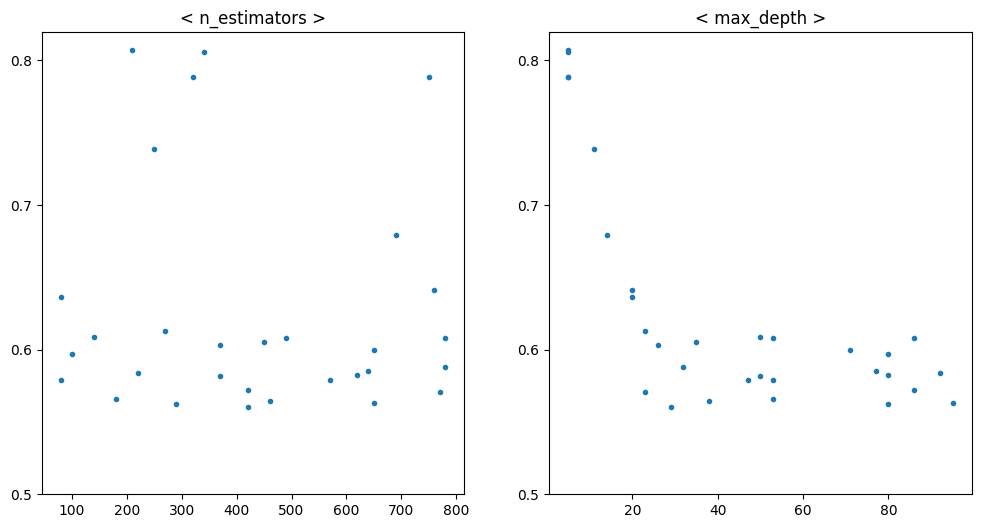

In [82]:
# n_estimators, max_depth에 대해 성능 변화를 시각화합니다

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(random_result["param_n_estimators"], -random_result["mean_test_score"], marker='.')
ax[0].set_title("< n_estimators >")
ax[0].set_yticks([0.5, 0.6, 0.7, 0.8])
ax[1].scatter(random_result["param_max_depth"], -random_result["mean_test_score"], marker='.')
ax[1].set_title("< max_depth >")
ax[1].set_yticks([0.5, 0.6, 0.7, 0.8])

plt.show()

n_estimators 파라미터는 변화에 따른 성능 변화가 뚜렷하지 않지만, max_depth 파라미터는 20 이하와 20 이상의 성능 변화가 뚜렷하게 나타납니다.

2. 학습 시간 변화 시각화

하이퍼파라미터 튜닝에서 또 하나 중요한 요소는 소요 시간입니다.

이번에는 학습 시간의 변화를 시각화 해보도록 할게요!

max_features와 n_estimators 파라미터에 대해 소요 시간 변화를 시각화 해보겠습니다.

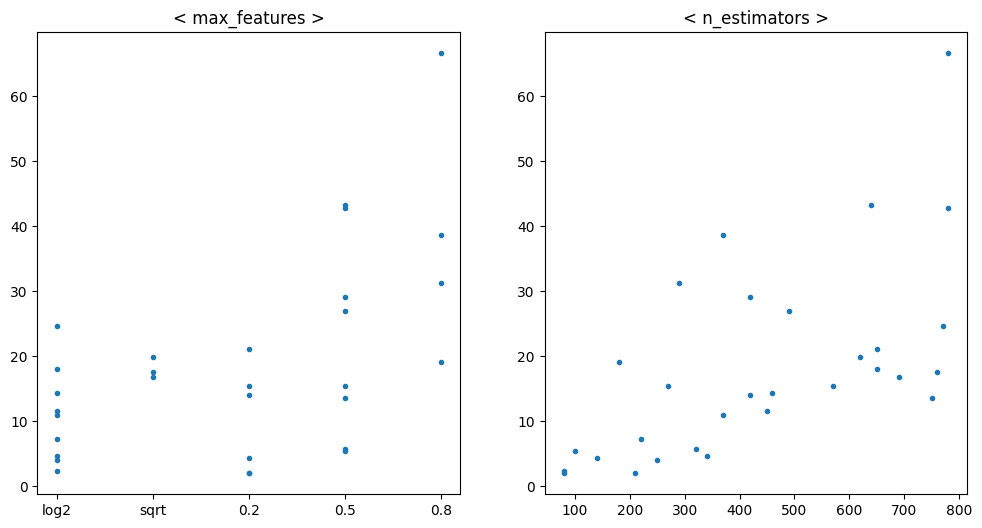

In [83]:
# max_features, n_estimators에 대해 소요 시간의 변화를 시각화합니다

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

max_features = random_result["param_max_features"].map({"log2": 0,
                                                        "sqrt": 1,
                                                        0.2: 2,
                                                        0.5: 3,
                                                        0.8: 4})

ax[0].scatter(max_features, random_result["mean_fit_time"], marker='.')
ax[0].set_title("< max_features >")
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].set_xticklabels(["log2", "sqrt", "0.2", "0.5", "0.8"])
ax[1].scatter(random_result["param_n_estimators"], random_result["mean_fit_time"], marker='.')
ax[1].set_title("< n_estimators >")

plt.show()

두 파라미터 모두 변화에 따라 학습 시간에 큰 영향을 미치는 것을 알 수 있습니다.

최고의 파라미터 조합과 최고의 점수도 각각 출력해볼게요!

In [84]:
# 최고의 파라미터 조합과 최고의 점수를 출력합니다
random_best_params = random_rf.best_params_
random_best_score = random_rf.best_score_

print(f"Best params: {random_best_params}")
print(f"Best score: {round(-random_best_score, 4)}")


Best params: {'n_estimators': 420, 'min_samples_split': 2, 'max_features': 0.2, 'max_depth': 29, 'criterion': 'entropy'}
Best score: 0.5604


다시 한 번 학습시켜 최종적으로 비교해보도록 하겠습니다.

In [85]:
rf_tune2 = random_rf.best_estimator_

rf_tune2.fit(X_train, y_train)
y_prob2 = rf_tune2.predict_proba(X_valid)

log_loss_random = log_loss(y_valid, y_prob2)

In [86]:
# 파라미터 튜닝 전과 비교합니다

print(f"Base model: {round(log_loss_2, 4)}")
print(f"Random Search: {round(log_loss_random, 4)}")

Base model: 0.4966
Random Search: 0.4963


와우! 드디어 튜닝 결과가 기존 모델에 비해서 더 좋아졌네요!🎉

심지어 저희는 이미 스플릿된 데이터에서 모델을 학습시켰기 때문에, 이전보다 더 적은 데이터만 사용했습니다.

파라미터에 대해 점점 더 나은 이해가 가능해지고 있어요!

이번에는 파라미터 자동 튜닝 패키지인 HyperOpt를 사용하도록 하겠습니다!

3. HyperOpt

GridSearch와 RandomSearch 이 외에도 자주 사용되는 파이썬 패키지들이 있습니다.

대표적인 패키지로 HyperOpt, Optuna, Tune 등의 패키지가 있습니다.

저희는 그 중 하나인 HyperOpt를 사용해서 하이퍼파라미터 튜닝을 해보도록 하겠습니다!

In [87]:

# HyeprOpt 패키지를 설치합니다
!pip install hyperopt

In [88]:

from hyperopt import tpe, hp, Trials
from hyperopt.fmin import fmin

💡 주요 함수 및 파라미터 설명

HyperOpt의 주요 함수 및 파라미터는 다음과 같습니다!

fmin() HyperOpt의 핵심 함수로, 목적 함수의 최솟값을 찾는 데 도와줍니다. 가장 작은 손실을 낸 하이퍼파라미터를 반환합니다. 주요 파라미터는 다음과 같습니다.

1). fn: 최적화시킬 모델입니다. 반드시 하이퍼파라미터 샘플을 제공받아야 합니다.

space: 샘플링 대상이 되는 하이퍼파라미터 공간입니다.

algo: 최적화 알고리즘입니다. 이번 프로젝트에서는 tpe.suggest 알고리즘을 사용하였습니다.

4). max_evals: 샘플링할 횟수입니다.

Trials(): 최적화 기록을 추적할 클래스 객체입니다.

hp: 하이퍼파라미터 생성을 도와주는 모듈입니다.

tpe: tpe.suggest 알고리즘을 포함하고 있는 모듈입니다.

앞에서의 하이퍼파라미터 튜닝 결과에 따라 n_estimators는 최댓값을 700으로 설정해주도록 하겠습니다.

또한,max_depth는 최솟값 20, 최댓값 100으로 설정해주겠습니다!

충분한 하이퍼파라미터 공간 탐색을 위해, max_evals=100으로 설정해주었습니다.

In [89]:
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])
    model = RandomForestClassifier(n_estimators=est, max_depth=md, min_samples_leaf=msl, min_samples_split=mss)
    model.fit(X_train, y_train)
    pred = model.predict_proba(X_valid)
    score = log_loss(y_valid, pred)
    return score

def optimize(trial):
    params={'n_estimators': hp.uniform('n_estimators', 50, 700),
           'max_depth': hp.uniform('max_depth', 20, 100),
           'min_samples_leaf': hp.uniform('min_samples_leaf', 1, 5),
           'min_samples_split': hp.uniform('min_samples_split', 2, 6)}
    best=fmin(fn=objective, space=params, algo=tpe.suggest, trials=trial, max_evals=100)
    return best

trial=Trials()
best=optimize(trial)

100%|██████████| 100/100 [22:25<00:00, 13.45s/trial, best loss: 0.4916330633421802]


하이퍼파라미터 튜닝이 끝났네요! 가장 좋은 파라미터 조합을 보도록 하겠습니다

In [90]:
print(f"best: {best}")

best: {'max_depth': 73.61618837166519, 'min_samples_leaf': 1.65478904485904, 'min_samples_split': 2.8524588704297793, 'n_estimators': 264.7217430533256}


정수형 하이퍼파라미터들이 모두 실수형으로 출력되었습니다. 정수로 바꿔주고, 최종 학습 시켜보도록 하겠습니다!

In [91]:

max_depth = round(best["max_depth"])
min_samples_leaf = round(best["min_samples_leaf"])
min_samples_split = round(best["min_samples_split"])
n_estimators = round(best["n_estimators"])

rf_tune3 = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split, random_state=42)
rf_tune3.fit(X_train, y_train)
y_prob3 = rf_tune3.predict_proba(X_valid)

log_loss_hyopt = log_loss(y_valid, y_prob3)

In [92]:
# 파라미터 튜닝 전과 비교합니다

print(f"Base model: {round(log_loss_2, 4)}")
print(f"HyperOpt: {round(log_loss_hyopt, 4)}")

Base model: 0.4966
HyperOpt: 0.5451


이렇게 하이퍼파라미터 튜닝을 마치도록 하겠습니다!

Step 3. 예측 결과 저장 및 제출

✨이제 마지막 스텝만 남았습니다!✨

예측 결과를 저장하고 CSV 파일로 저장하고 제출해주도록 할게요!

CSV 파일로 만들 때, index=False 옵션을 설정해주는 것을 잊지 마세요!

Random Search의 결과가 제일 좋았기 때문에, 해당 값으로 하이퍼파라미터를 세팅해주도록 하겠습니다.

In [93]:

model = RandomForestClassifier(n_estimators=400, min_samples_split=4,
                              max_features=0.8, max_depth=47, criterion="entropy",
                              random_state=42)

model.fit(X_train, y_train)
y_prob = model.predict_proba(X_valid)

log_loss_final = log_loss(y_valid, y_prob)
print(f"log_loss: {round(log_loss_final, 4)}")

log_loss: 0.4867


In [94]:
y_pred = model.predict_proba(test)

In [95]:

# 예측 결과를 제출 파일에 저장합니다

submission.iloc[:, 1:] = y_pred
submission

,index,0,1,2
0,26457,0.048583,0.040375,0.911042
1,26458,0.276458,0.184417,0.539125
2,26459,0.052708,0.127083,0.820208
3,26460,0.326375,0.228292,0.445333
4,26461,0.109750,0.352958,0.537292
...,...,...,...,...
9995,36452,0.188333,0.253833,0.557833
9996,36453,0.648699,0.079051,0.272250
9997,36454,0.010542,0.008750,0.980708
9998,36455,0.053750,0.334536,0.611714


In [97]:

# submit.csv라는 파일로 저장합니다

submission.to_csv("/content/drive/MyDrive/Colab Notebooks/final_submission.csv", index=False)